<a href="https://colab.research.google.com/github/varshitha127/iAccelerateH/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [ ]:
# Define dataset paths
dataset_paths = [
    "/content/sample_data/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv",
    "/content/sample_data/CLEAN- PCOS SURVEY SPREADSHEET.csv",
    "/content/sample_data/CVD_cleaned[1].csv",
    "/content/sample_data/Female_Only_Corrected.csv",
    "/content/sample_data/Female_Only_MentalHealth.csv",
    "/content/sample_data/kag_risk_factors_cervical_cancer.csv",
    "/content/sample_data/Maternal Health Risk Data Set.csv",
    "/content/sample_data/post natal data.csv",
    "/content/sample_data/reproductiveAgeWomen.csv",
    "/content/sample_data/survey.csv"
]

# Load and process datasets in chunks of 5000 rows
dfs = []
for path in dataset_paths:
    for chunk in pd.read_csv(path, encoding='latin1', chunksize=5000):  # Process in chunks
        dfs.append(chunk)

# Concatenate all loaded chunks
combined_df = pd.concat(dfs, ignore_index=True)
del dfs  # Free memory


In [ ]:
# Drop irrelevant columns if present
combined_df = combined_df.drop(columns=['ID', 'Name', 'PatientID'], errors='ignore')

# Fill missing values
for col in combined_df.select_dtypes(include=np.number).columns:
    combined_df[col] = combined_df[col].fillna(combined_df[col].median())  # Use median for numerical values

for col in combined_df.select_dtypes(exclude=np.number).columns:
    combined_df[col] = combined_df[col].fillna(combined_df[col].mode()[0])  # Use mode for categorical values


In [ ]:
# Convert categorical data into numeric using Label Encoding
for col in combined_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col].astype(str))


In [ ]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)


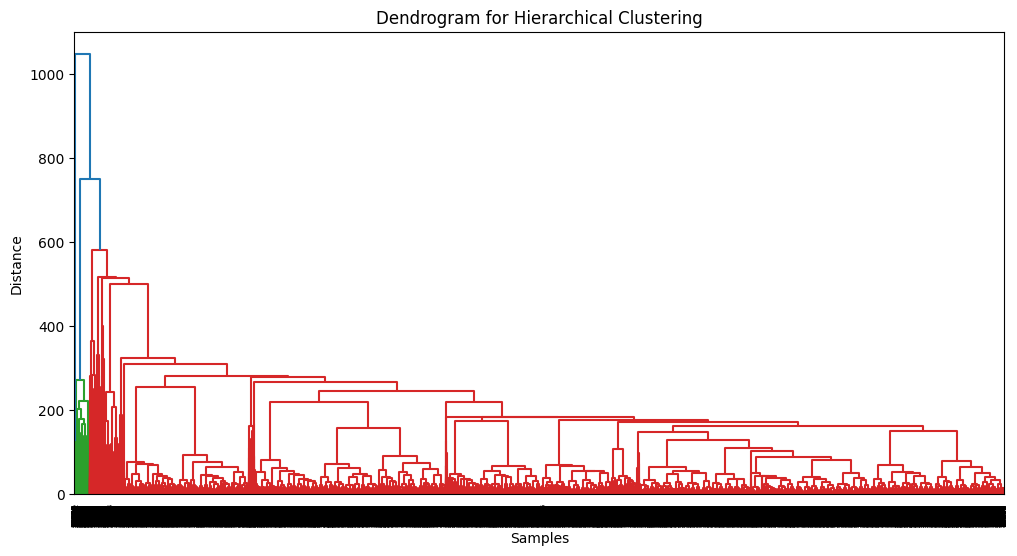

Hierarchical clustering applied. Cluster labels assigned successfully!


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sample the dataset
sampled_data = combined_df.sample(n=35000, random_state=42).copy()

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sampled_data)

# Perform Hierarchical Clustering
linked = linkage(scaled_data, method='ward')

# Define the number of clusters (adjust based on the dendrogram)
num_clusters = 5  # Change as needed

# Assign cluster labels
sampled_data['Cluster_Hierarchical'] = fcluster(linked, num_clusters, criterion='maxclust')

# Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Print confirmation
print("Hierarchical clustering applied. Cluster labels assigned successfully!")


In [ ]:
from sklearn.mixture import GaussianMixture

# Define the number of clusters (same as hierarchical clustering)
n_clusters = 4

# Initialize and fit GMM
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
gmm_clusters = gmm.fit_predict(scaled_data)

# Use pd.concat() to avoid fragmentation issues
sampled_data = pd.concat([sampled_data, pd.Series(gmm_clusters, name='Cluster_GMM', index=sampled_data.index)], axis=1)

# Optional: Copy the dataframe to remove fragmentation
sampled_data = sampled_data.copy()

# Display the first few rows with cluster labels
print(sampled_data.head())


       Sex  AgeBaseline  HistoryDiabetes  HistoryCHD  HistoryVascular  \
43044    2         54.0              0.0         0.0              0.0   
55472    2         54.0              0.0         0.0              0.0   
95364    2         54.0              0.0         0.0              0.0   
87709    2         54.0              0.0         0.0              0.0   
93645    2         54.0              0.0         0.0              0.0   

       HistorySmoking  HistoryHTN   HistoryDLD  HistoryObesity  DLDmeds  ...  \
43044             0.0          1.0         1.0             1.0      1.0  ...   
55472             0.0          1.0         1.0             1.0      1.0  ...   
95364             0.0          1.0         1.0             1.0      1.0  ...   
87709             0.0          1.0         1.0             1.0      1.0  ...   
93645             0.0          1.0         1.0             1.0      1.0  ...   

       Feeling anxious  Feeling of guilt  Problems of bonding with baby  \
43044

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate Hierarchical Clustering
silhouette_hierarchical = silhouette_score(scaled_data, fcluster(linked, n_clusters, criterion='maxclust'))
dbi_hierarchical = davies_bouldin_score(scaled_data, fcluster(linked, n_clusters, criterion='maxclust'))

# Evaluate GMM Clustering
silhouette_gmm = silhouette_score(scaled_data, gmm_clusters)
dbi_gmm = davies_bouldin_score(scaled_data, gmm_clusters)

# Print results
print(f"Silhouette Score (Hierarchical): {silhouette_hierarchical}")
print(f"Silhouette Score (GMM): {silhouette_gmm}")
print(f"Davies-Bouldin Index (Hierarchical): {dbi_hierarchical}")
print(f"Davies-Bouldin Index (GMM): {dbi_gmm}")


Silhouette Score (Hierarchical): 0.7894099295594666
Silhouette Score (GMM): 0.784719151208798
Davies-Bouldin Index (Hierarchical): 1.8167730267785043
Davies-Bouldin Index (GMM): 1.8572337719330259


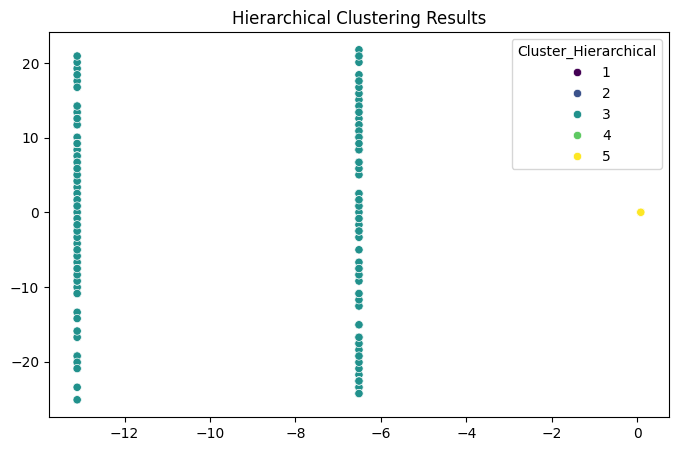

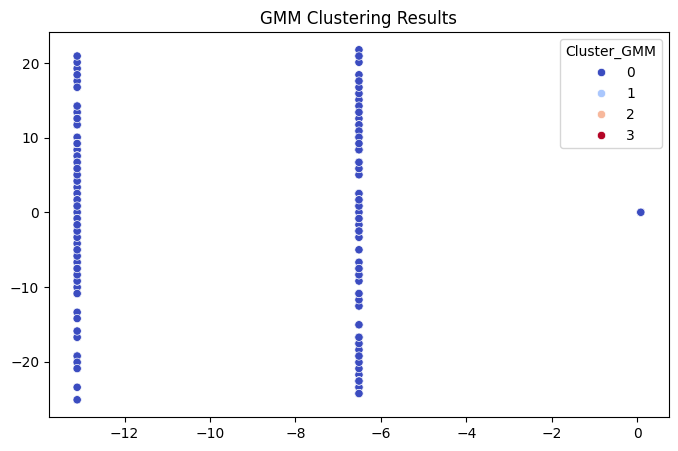

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hierarchical Clustering Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=sampled_data['Cluster_Hierarchical'], palette='viridis')
plt.title("Hierarchical Clustering Results")
plt.show()

# GMM Clustering Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=sampled_data['Cluster_GMM'], palette='coolwarm')
plt.title("GMM Clustering Results")
plt.show()


In [ ]:
# Save the sampled data with clusters
sampled_data.to_csv("/content/clustered_healthcare_data.csv", index=False)

print("Clustered data saved successfully!")

Clustered data saved successfully!


In [ ]:
print(sampled_data['Cluster_Hierarchical'].value_counts())
print(sampled_data['Cluster_GMM'].value_counts())


Cluster_Hierarchical
5    33966
2      539
3      273
4      176
1       46
Name: count, dtype: int64
Cluster_GMM
0    34277
3      539
2      176
1        8
Name: count, dtype: int64


In [ ]:
print(sampled_data.head())


       Sex  AgeBaseline  HistoryDiabetes  HistoryCHD  HistoryVascular  \
54406    2         54.0              0.0         0.0              0.0   
75262    2         54.0              0.0         0.0              0.0   
71851    2         54.0              0.0         0.0              0.0   
36089    2         54.0              0.0         0.0              0.0   
63349    2         54.0              0.0         0.0              0.0   

       HistorySmoking  HistoryHTN   HistoryDLD  HistoryObesity  DLDmeds  ...  \
54406             0.0          1.0         1.0             1.0      1.0  ...   
75262             0.0          1.0         1.0             1.0      1.0  ...   
71851             0.0          1.0         1.0             1.0      1.0  ...   
36089             0.0          1.0         1.0             1.0      1.0  ...   
63349             0.0          1.0         1.0             1.0      1.0  ...   

       Feeling anxious  Feeling of guilt  Problems of bonding with baby  \
54406

In [ ]:
print(sampled_data.isnull().sum())


Sex                     0
AgeBaseline             0
HistoryDiabetes         0
HistoryCHD              0
HistoryVascular         0
                       ..
Indicator               0
Period                  0
First Tooltip           0
Cluster_Hierarchical    0
Cluster_GMM             0
Length: 140, dtype: int64


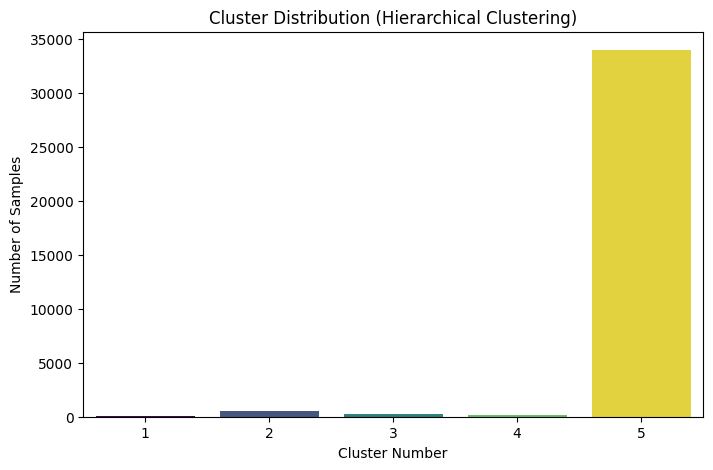

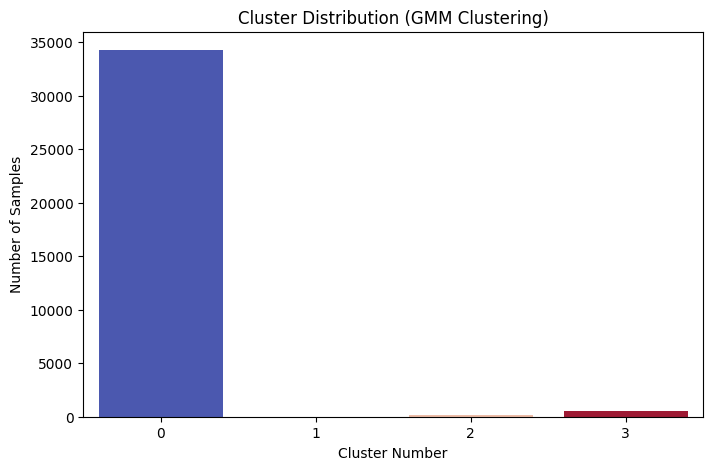

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hierarchical Clustering Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=sampled_data, x="Cluster_Hierarchical", hue="Cluster_Hierarchical", palette="viridis", legend=False)
plt.title("Cluster Distribution (Hierarchical Clustering)")
plt.xlabel("Cluster Number")
plt.ylabel("Number of Samples")
plt.show()

# GMM Clustering Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=sampled_data, x="Cluster_GMM", hue="Cluster_GMM", palette="coolwarm", legend=False)
plt.title("Cluster Distribution (GMM Clustering)")
plt.xlabel("Cluster Number")
plt.ylabel("Number of Samples")
plt.show()


In [ ]:
# Correct any spelling issues and use actual column names
health_factors = ["AgeBaseline", "HistoryDiabetes", "HistoryCHD", "HistoryHTN ", "HistoryObesity"]  # Check the extra space

# Compute cluster-wise statistics
cluster_stats_gmm = sampled_data.groupby("Cluster_GMM")[health_factors].mean()
cluster_stats_hierarchical = sampled_data.groupby("Cluster_Hierarchical")[health_factors].mean()

print("Cluster-wise Health Statistics (GMM):\n", cluster_stats_gmm)
print("Cluster-wise Health Statistics (Hierarchical):\n", cluster_stats_hierarchical)


Cluster-wise Health Statistics (GMM):
              AgeBaseline  HistoryDiabetes  HistoryCHD  HistoryHTN   \
Cluster_GMM                                                          
0              53.989818         0.003355    0.000496     0.997258   
1              54.000000         0.000000    0.000000     1.000000   
2              54.000000         0.000000    0.000000     1.000000   
3              54.000000         0.000000    0.000000     1.000000   

             HistoryObesity  
Cluster_GMM                  
0                  0.996061  
1                  1.000000  
2                  1.000000  
3                  1.000000  
Cluster-wise Health Statistics (Hierarchical):
                       AgeBaseline  HistoryDiabetes  HistoryCHD  HistoryHTN   \
Cluster_Hierarchical                                                          
1                       54.000000         0.000000    0.000000     1.000000   
2                       54.000000         0.000000    0.000000     1.000000

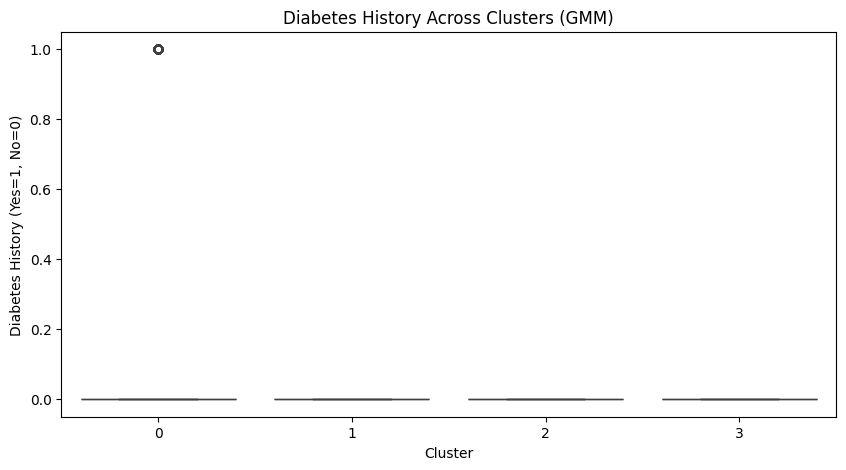

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=sampled_data['Cluster_GMM'], y=sampled_data['HistoryDiabetes'])
plt.title("Diabetes History Across Clusters (GMM)")
plt.xlabel("Cluster")
plt.ylabel("Diabetes History (Yes=1, No=0)")
plt.show()


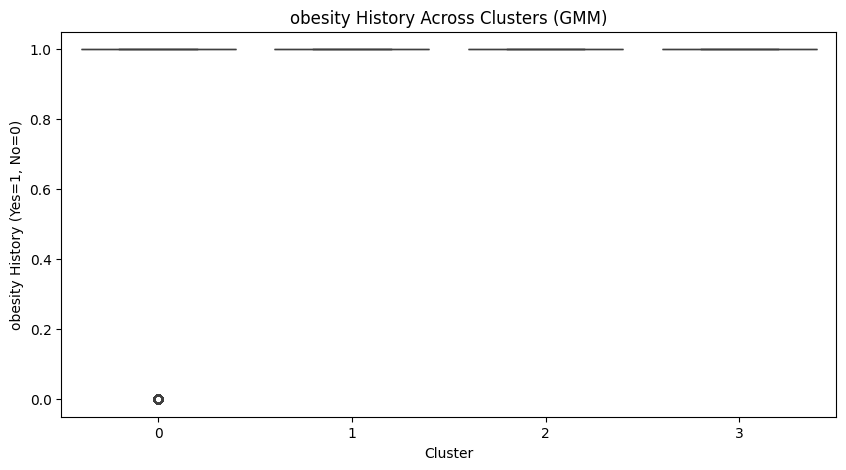

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=sampled_data['Cluster_GMM'], y=sampled_data['HistoryObesity'])
plt.title("obesity History Across Clusters (GMM)")
plt.xlabel("Cluster")
plt.ylabel("obesity History (Yes=1, No=0)")
plt.show()

In [ ]:
sampled_data.columns = sampled_data.columns.str.strip()  # Removes extra spaces
sampled_data.columns = sampled_data.columns.str.replace(" ", "_")  # Replaces spaces with underscores


In [ ]:
print(sampled_data.head())  # Check the first few rows
print(sampled_data.info())  # Check data types and missing columns

       Sex  AgeBaseline  HistoryDiabetes  HistoryCHD  HistoryVascular  \
43044    2         54.0              0.0         0.0              0.0   
55472    2         54.0              0.0         0.0              0.0   
95364    2         54.0              0.0         0.0              0.0   
87709    2         54.0              0.0         0.0              0.0   
93645    2         54.0              0.0         0.0              0.0   

       HistorySmoking  HistoryHTN  HistoryDLD  HistoryObesity  DLDmeds  ...  \
43044             0.0         1.0         1.0             1.0      1.0  ...   
55472             0.0         1.0         1.0             1.0      1.0  ...   
95364             0.0         1.0         1.0             1.0      1.0  ...   
87709             0.0         1.0         1.0             1.0      1.0  ...   
93645             0.0         1.0         1.0             1.0      1.0  ...   

       Feeling_anxious  Feeling_of_guilt  Problems_of_bonding_with_baby  \
43044      

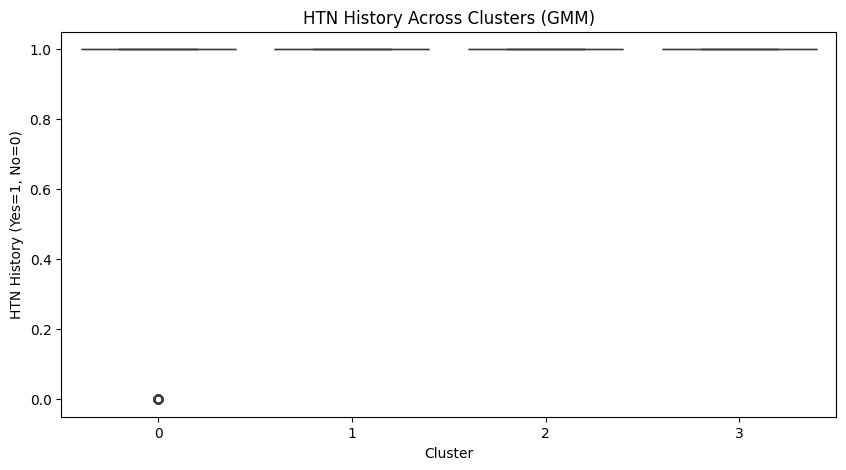

In [ ]:
if 'HistoryHTN' in sampled_data.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=sampled_data['Cluster_GMM'], y=sampled_data['HistoryHTN'])
    plt.title("HTN History Across Clusters (GMM)")
    plt.xlabel("Cluster")
    plt.ylabel("HTN History (Yes=1, No=0)")
    plt.show()
else:
    print("Column 'HistoryHTN' not found in sampled_data.")


In [ ]:
import pandas as pd
import numpy as np

# Define key health indicators for recommendations
health_factors = [
    "AgeBaseline", "HistoryDiabetes", "HistoryCHD", "HistoryHTN", "HistoryObesity",
    "Feeling_anxious", "Feeling_of_guilt", "Suicide_attempt"
]

# Compute cluster-wise health statistics
cluster_stats_gmm = sampled_data.groupby("Cluster_GMM")[health_factors].mean()
cluster_stats_hierarchical = sampled_data.groupby("Cluster_Hierarchical")[health_factors].mean()

# Function to determine risk levels
def determine_risk(value):
    if value > 0.6:
        return "🔴 High Risk"
    elif value > 0.3:
        return "🟡 Medium Risk"
    else:
        return "🟢 Low Risk"

# Function to generate personalized recommendations
def generate_recommendations(cluster_id, method="GMM"):
    """
    Generates personalized healthcare recommendations based on cluster health stats.

    Args:
    - cluster_id (int): The cluster number.
    - method (str): "GMM" or "Hierarchical" clustering method.

    Returns:
    - str: Personalized healthcare recommendation.
    """
    cluster_data = cluster_stats_gmm.loc[cluster_id] if method == "GMM" else cluster_stats_hierarchical.loc[cluster_id]
    recommendations = []
    risk_report = {factor: determine_risk(cluster_data[factor]) for factor in health_factors}

    # Age-Based Advice
    if cluster_data["AgeBaseline"] > 50:
        recommendations.append("🔹 Regular health checkups recommended for age-related conditions.")

    # Health Risks and Recommendations
    if cluster_data["HistoryDiabetes"] > 0.5:
        recommendations.append("🩸 Monitor blood sugar, exercise regularly, and reduce sugar intake.")
        recommendations.append("🥦 Recommended Diet: Whole grains, lean protein, and leafy vegetables.")
        recommendations.append("🏃‍♀️ Recommended Exercise: 30 minutes of cardio (walking, cycling).")

    if cluster_data["HistoryCHD"] > 0.5:
        recommendations.append("💙 Follow a heart-healthy diet, stay active, and get cardiac screenings.")
        recommendations.append("🍏 Eat omega-3-rich foods like salmon and nuts.")
        recommendations.append("🚶‍♂️ Light exercise like yoga and brisk walking recommended.")

    if cluster_data["HistoryHTN"] > 0.5:
        recommendations.append("🩺 Monitor blood pressure, reduce salt intake, and practice stress management.")
        recommendations.append("💧 Increase water intake and reduce caffeine consumption.")

    if cluster_data["HistoryObesity"] > 0.5:
        recommendations.append("🏃‍♂️ Maintain a balanced diet, exercise, and focus on weight management.")
        recommendations.append("⚖️ Consider portion control and intermittent fasting.")

    # Mental Health Risks
    if cluster_data["Feeling_anxious"] > 0.3:
        recommendations.append("🧘‍♂️ Practice meditation and mindfulness to manage anxiety.")
        recommendations.append("🎵 Try listening to calming music before sleep.")

    if cluster_data["Feeling_of_guilt"] > 0.3:
        recommendations.append("💬 Seek therapy or counseling for emotional well-being.")
        recommendations.append("📖 Journaling can help with emotional expression.")

    if cluster_data["Suicide_attempt"] > 0.1:
        recommendations.append("🚨 Immediate professional support is strongly recommended. Seek help.")
        recommendations.append("☎️ Contact a mental health professional immediately.")

    # Preventive Measures
    recommendations.extend([
        "💊 Ensure proper vaccinations and regular medical screenings.",
        "🥦 Follow a balanced diet with essential nutrients.",
        "💧 Stay hydrated and get at least 7-8 hours of sleep.",
        "📅 Schedule a yearly full-body checkup."
    ])

    return f"🟢 Cluster {cluster_id} Recommendations:\n" + "\n".join(recommendations) + "\n\n🩺 Risk Report:\n" + str(risk_report)

# Generate and print recommendations for each cluster
for cluster in cluster_stats_gmm.index:
    print(generate_recommendations(cluster, method="GMM"))
    print("-" * 50)

for cluster in cluster_stats_hierarchical.index:
    print(generate_recommendations(cluster, method="Hierarchical"))
    print("-" * 50)


🟢 Cluster 0 Recommendations:
🔹 Regular health checkups recommended for age-related conditions.
🩺 Monitor blood pressure, reduce salt intake, and practice stress management.
💧 Increase water intake and reduce caffeine consumption.
🏃‍♂️ Maintain a balanced diet, exercise, and focus on weight management.
⚖️ Consider portion control and intermittent fasting.
🧘‍♂️ Practice meditation and mindfulness to manage anxiety.
🎵 Try listening to calming music before sleep.
💬 Seek therapy or counseling for emotional well-being.
📖 Journaling can help with emotional expression.
💊 Ensure proper vaccinations and regular medical screenings.
🥦 Follow a balanced diet with essential nutrients.
💧 Stay hydrated and get at least 7-8 hours of sleep.
📅 Schedule a yearly full-body checkup.

🩺 Risk Report:
{'AgeBaseline': '🔴 High Risk', 'HistoryDiabetes': '🟢 Low Risk', 'HistoryCHD': '🟢 Low Risk', 'HistoryHTN': '🔴 High Risk', 'HistoryObesity': '🔴 High Risk', 'Feeling_anxious': '🔴 High Risk', 'Feeling_of_guilt': '🔴 H